In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# notes: scanpy has several versions, afer 17May2020, it become 1.5.1 from 1.4.6
!pip install scanpy
!pip install leidenalg

In [0]:
#!pip install bbknn==1.3.6
#pip install umap-learn==0.3.9

In [3]:
import h5py
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# notice that scanpy already became 1.5.1 after 17May2020
sc.settings.verbosity = 3 
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, figsize=(4, 4))

scanpy==1.5.1 anndata==0.7.3 umap==0.4.3 numpy==1.18.4 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.22.2.post1 statsmodels==0.10.2 python-igraph==0.8.2 leidenalg==0.8.0


In [0]:
import os
os.chdir("/content/drive/Shared drives/CARD/projects/iNDI/line_prioritization/projects_lirong/Florian_data")

In [0]:
%cd /content/drive/Shared drives/CARD/projects/iNDI/line_prioritization/projects_lirong/Florian_data/


## find some discrepacy between the length of barcodes and adata

So use left join in the funcion of demultiplexing

In [6]:
file_list = ["cortical_dopaminergic_sample_1", "cortical_dopaminergic_sample_2", "cortical_dopaminergic_sample_3", 
             "cortical_dopaminergic_sample_4", "hypothalamic_sample_1", "hypothalamic_sample_2"]
adata_list = []
for file in file_list:
  adata = sc.read_10x_mtx(file+"/filtered_cellranger_matrix/", var_names='gene_symbols', cache=True)
  adata.var_names_make_unique()
  adata_list.append(adata)


... reading from cache file cache/cortical_dopaminergic_sample_1-filtered_cellranger_matrix-matrix.h5ad
... reading from cache file cache/cortical_dopaminergic_sample_2-filtered_cellranger_matrix-matrix.h5ad
... reading from cache file cache/cortical_dopaminergic_sample_3-filtered_cellranger_matrix-matrix.h5ad
... reading from cache file cache/cortical_dopaminergic_sample_4-filtered_cellranger_matrix-matrix.h5ad
... reading from cache file cache/hypothalamic_sample_1-filtered_cellranger_matrix-matrix.h5ad
... reading from cache file cache/hypothalamic_sample_2-filtered_cellranger_matrix-matrix.h5ad


In [0]:
# the donor demultiplexing data is performed by Andrian and stored in the following path
# /content/drive/Shared drives/CARD/projects/iNDI/line_prioritization/projects_lirong/Florian_data/vireo_cell_line_assignments/

#First check the concat_florian's data

In [0]:
# error cell number in donors are not equal to that of cell numbers in adata
# do inner join or left join

donor_path =["vireo_cell_line_assignments/Sample_1_vireo_vartrix_genotype/donor_ids.tsv",
             "vireo_cell_line_assignments/Sample_2_vireo_vartrix_genotype/donor_ids.tsv",
             "vireo_cell_line_assignments/Sample_3_vireo_vartrix_genotype/donor_ids.tsv",
             "vireo_cell_line_assignments/Sample_4_vireo_vartrix_genotype/donor_ids.tsv",
             "vireo_cell_line_assignments/Sample_SIGAF1_vireo_vartrix_genotype/donor_ids.tsv",
             "vireo_cell_line_assignments/Sample_SIGAG1_vireo_vartrix_genotype/donor_ids.tsv"]
            

In [0]:
save_path = ["cortical_dopaminergic_sample_1/scanpy_out/",
             "cortical_dopaminergic_sample_2/scanpy_out/",
             "cortical_dopaminergic_sample_3/scanpy_out/",
             "cortical_dopaminergic_sample_4/scanpy_out/",
             "hypothalamic_sample_1/scanpy_out/",
             "hypothalamic_sample_2/scanpy_out/"]


In [0]:
# Andrian has already replaced the donor_id with the donor_label instead of expriment_id
def demultiplexing_donor(donor_path, save_path, adata):
  # the donor path must be end with "/"
  donors= pd.read_csv(donor_path, '\t', index_col="cell")
  donors["donor_label"] = donors["donor_id"]
  donors = donors[["donor_label"]]
  print(len(donors))
  print(len(adata.obs))
  adata.obs = adata.obs.merge(donors, how="left", left_index=True, right_index=True)
  adata.write_h5ad(save_path+"_with_donors.h5ad")
  return adata


In [10]:
for i in range(len(adata_list)):
  adata_list[i] = demultiplexing_donor(donor_path[i], save_path[i], adata_list[i])


... storing 'donor_label' as categorical


12197
10659


... storing 'feature_types' as categorical
... storing 'donor_label' as categorical


11572
11630


... storing 'feature_types' as categorical
... storing 'donor_label' as categorical


10315
9904


... storing 'feature_types' as categorical
... storing 'donor_label' as categorical


11101
10816


... storing 'feature_types' as categorical
... storing 'donor_label' as categorical


9662
9769


... storing 'feature_types' as categorical
... storing 'donor_label' as categorical


10143
10287


... storing 'feature_types' as categorical


## Concatenate all florian adata

In [0]:
adata1, adata2, adata3, adata4, adata5, adata6 = adata_list

In [12]:
adata1

AnnData object with n_obs × n_vars = 10659 × 33538
    obs: 'donor_label'
    var: 'gene_ids', 'feature_types'

In [13]:
adata6

AnnData object with n_obs × n_vars = 10287 × 33538
    obs: 'donor_label'
    var: 'gene_ids', 'feature_types'

In [0]:
adata_concat = adata1.concatenate([adata2, adata3, adata4, adata5, adata6], 
                                  batch_categories=["cortical_1", "cortical_2", "dopaminergic_1", "dopaminergic_2", "hypothalamic_1", "hypothalamic_2"])

In [0]:
adata_concat.write_h5ad("concat_florian_whole_donor_raw.h5ad")

In [15]:
adata_concat.obs.batch.value_counts()

cortical_2        11630
dopaminergic_2    10816
cortical_1        10659
hypothalamic_2    10287
dopaminergic_1     9904
hypothalamic_1     9769
Name: batch, dtype: int64

In [16]:
adata_concat.obs.donor_label.value_counts()

PGP1-C2            14831
NN0003932-C3       11999
NCRM5-C5            7300
doublet             6389
KOLF2-ARID2-A02     6110
NCRM1-C6            5351
LNGPI1-C1           5346
KUCG3-C1            2274
donor7              1823
nan                 1583
unassigned            59
Name: donor_label, dtype: int64

In [0]:
batch_names = adata_concat.obs.batch.value_counts().index.to_list()

In [18]:
for batch in batch_names:
  print(batch)
  df_donor = adata_concat[adata_concat.obs["batch"]==batch,:].obs.donor_label.value_counts()
  print(df_donor)
  df_donor.to_csv(batch+"_donor.csv")
  print()


cortical_2
PGP1-C2            2848
NN0003932-C3       2238
KOLF2-ARID2-A02    1598
NCRM5-C5           1316
doublet            1206
LNGPI1-C1           969
NCRM1-C6            922
nan                 423
KUCG3-C1            106
unassigned            4
Name: donor_label, dtype: int64

dopaminergic_2
PGP1-C2            3587
NN0003932-C3       2169
doublet            1149
NCRM1-C6           1089
LNGPI1-C1           879
NCRM5-C5            778
KOLF2-ARID2-A02     704
nan                 246
KUCG3-C1            207
unassigned            8
Name: donor_label, dtype: int64

cortical_1
PGP1-C2            2597
NN0003932-C3       2075
KOLF2-ARID2-A02    1511
doublet            1354
NCRM5-C5           1197
LNGPI1-C1           901
NCRM1-C6            848
KUCG3-C1             95
nan                  74
unassigned            7
Name: donor_label, dtype: int64

hypothalamic_2
NN0003932-C3       1962
PGP1-C2            1647
LNGPI1-C1           997
KUCG3-C1            986
donor7              925
NCRM5-C5 

In [0]:
# concatenate florian and ipsc
adata_ipsc = sc.read_h5ad("/content/drive/Shared drives/CARD/projects/iNDI/line_prioritization/projects_lirong/pool_iPSC/pool_iPSC_with_donors.h5ad")
adata_ipsc.var_names_make_unique()

In [0]:
adata_florian_ipsc = adata_ipsc.concatenate(adata_list, 
                                            batch_categories=["pool_iPSC", "cortical_1", "cortical_2", "dopaminergic_1", "dopaminergic_2", "hypothalamic_1", "hypothalamic_2"])

In [0]:
adata_florian_ipsc.write_h5ad("florian_ipsc_whole_donor_raw.h5ad")

In [21]:
%ls -lth

total 5.6G
-rw------- 1 root root 2.3G May 25 20:47  florian_concat_pca.h5ad
-rw------- 1 root root 1.7G May 25 19:15  concat_florian_whole_donor_raw.h5ad
-rw------- 1 root root 1.8G May 25 19:13  florian_ipsc_whole_donor_raw.h5ad
-rw------- 1 root root  151 May 25 19:03  cortical_1_donor.csv
-rw------- 1 root root  153 May 25 19:03  cortical_2_donor.csv
-rw------- 1 root root  152 May 25 19:03  dopaminergic_1_donor.csv
-rw------- 1 root root  152 May 25 19:03  dopaminergic_2_donor.csv
-rw------- 1 root root  162 May 25 19:03  hypothalamic_1_donor.csv
-rw------- 1 root root  162 May 25 19:03  hypothalamic_2_donor.csv
-rw------- 1 root root  151 May 25 17:52 'Untitled spreadsheet.gsheet'
drwx------ 2 root root 4.0K May 25 16:25  cache/
-rw------- 1 root root  151 May 18 02:10  Florian_data.gslides
drwx------ 9 root root 4.0K May 17 00:48  vireo_cell_line_assignments/
drwx------ 2 root root 4.0K May 17 00:46  cluster_marker_expression/
drwx------ 2 root root 4.0K May 13 20:08  figures/
-

In [0]:
# notice the label differene between florian's data and my ipsc
adata_florian_ipsc.obs.donor_label.value_counts()

PGP1-C2                         15326
NN0003932-C3                    11999
NCRM5-C5                         7371
KOLF2-ARID2-A02                  6507
doublet                          6389
NCRM1-C6                         6379
LNGPI1-C1                        5651
KUCG3-C1                         2925
donor7                           1823
nan                              1784
NN0003932-C3 or NN0004297-C1      310
unassigned                         59
Name: donor_label, dtype: int64

In [0]:
#basic filter
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 11 cells that have less than 200 genes expressed
filtered out 6290 genes that are detected in less than 3 cells


normalizing counts per cell
    finished (0:00:01)


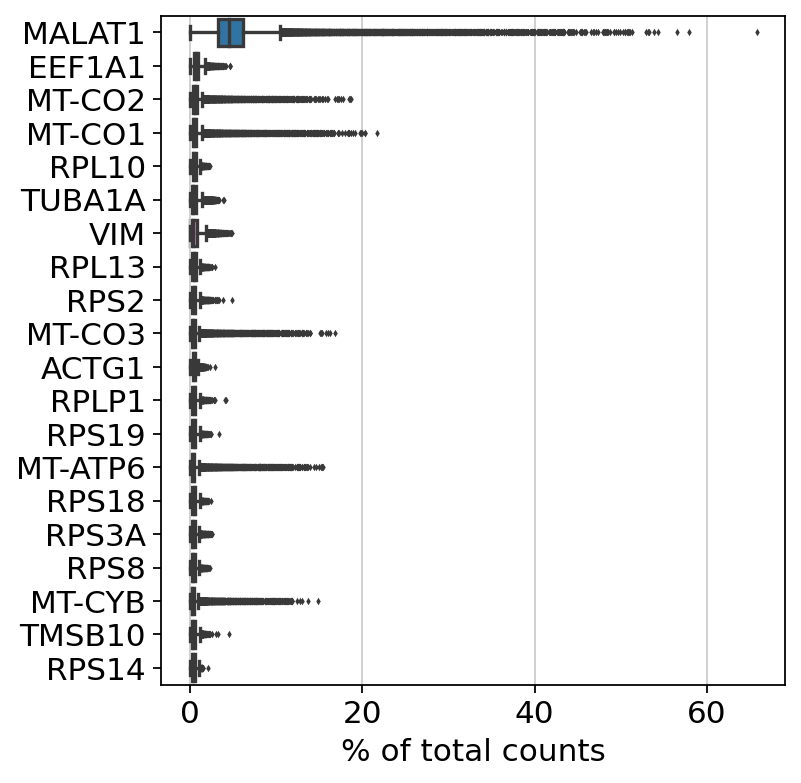

In [0]:
sc.pl.highest_expr_genes(adata, n_top=20)

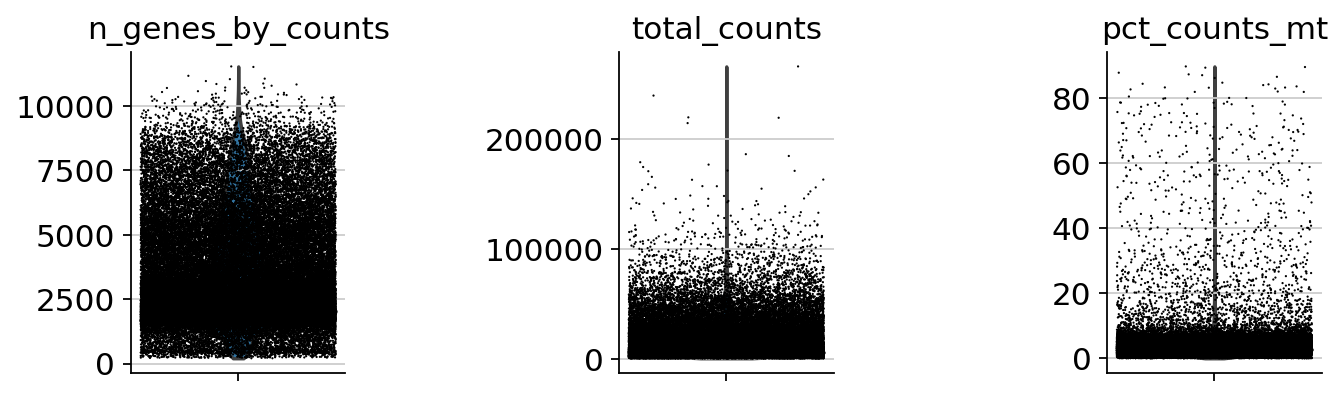

In [0]:
#this is one of change in the new tutorial
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata,qc_vars=["mt"], percent_top=None, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

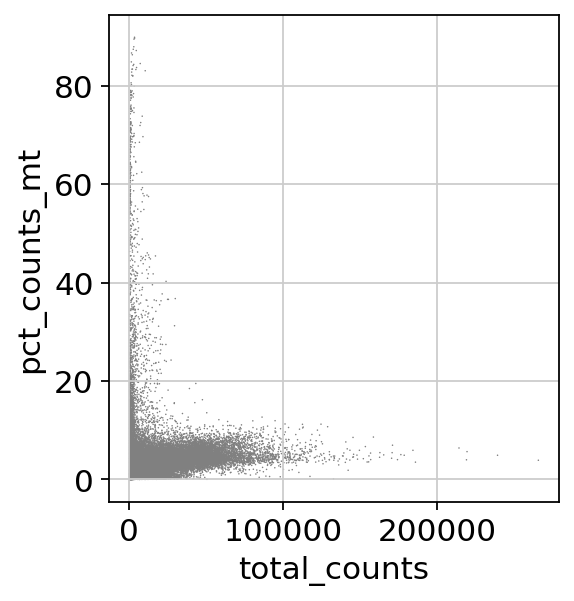

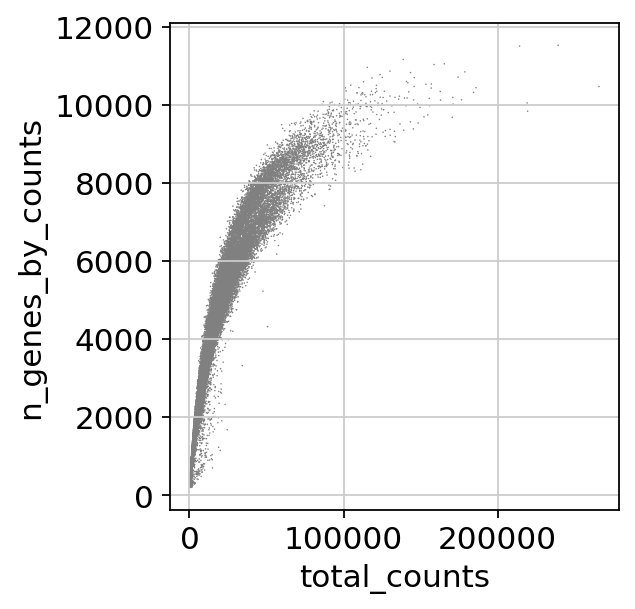

In [0]:
sc.pl.scatter(adata, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")

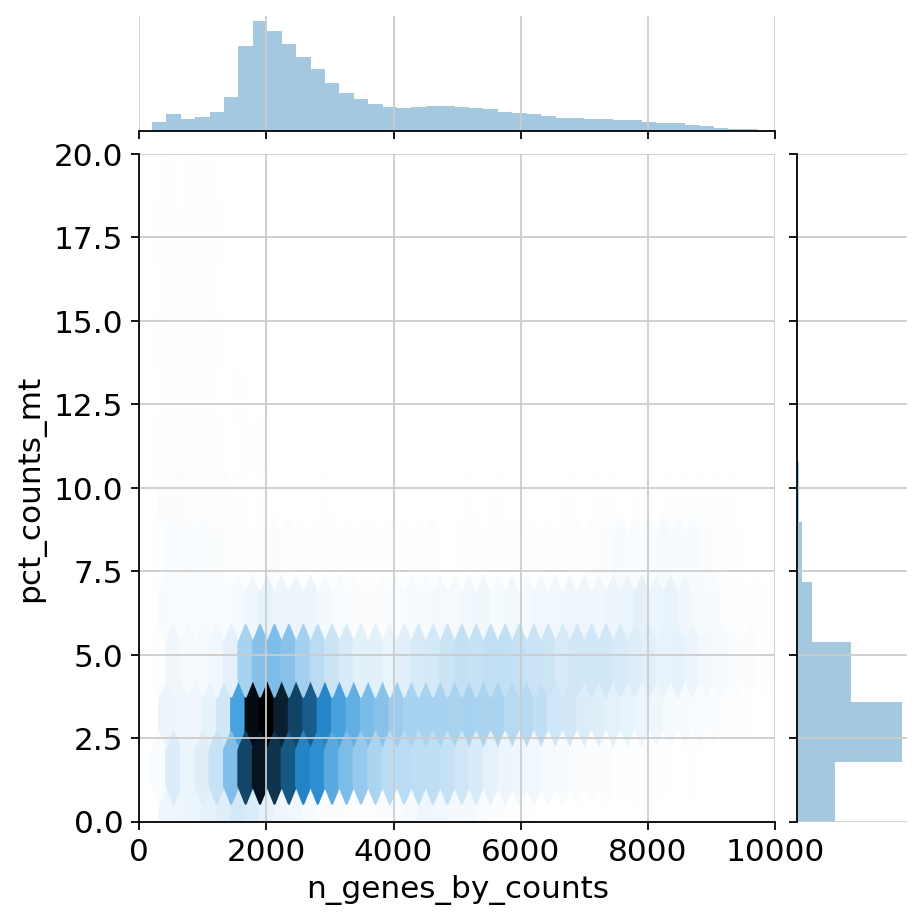

In [0]:
sns.jointplot(
        "n_genes_by_counts", "pct_counts_mt",
        data=adata.obs, kind="hex",
        xlim = (0, 10000),
        ylim = (0, 20)
    )

In [0]:
adata = adata[adata.obs.n_genes_by_counts < 9000, :]
adata = adata[adata.obs.pct_counts_mt < 10, :]

In [0]:
adata

View of AnnData object with n_obs × n_vars = 60832 × 27248
    obs: 'donor_label', 'batch', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [0]:
sc.pp.normalize_total(adata, target_sum=1e4)

/usr/local/lib/python3.6/dist-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


In [0]:
sc.pp.log1p(adata)

In [0]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:07)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


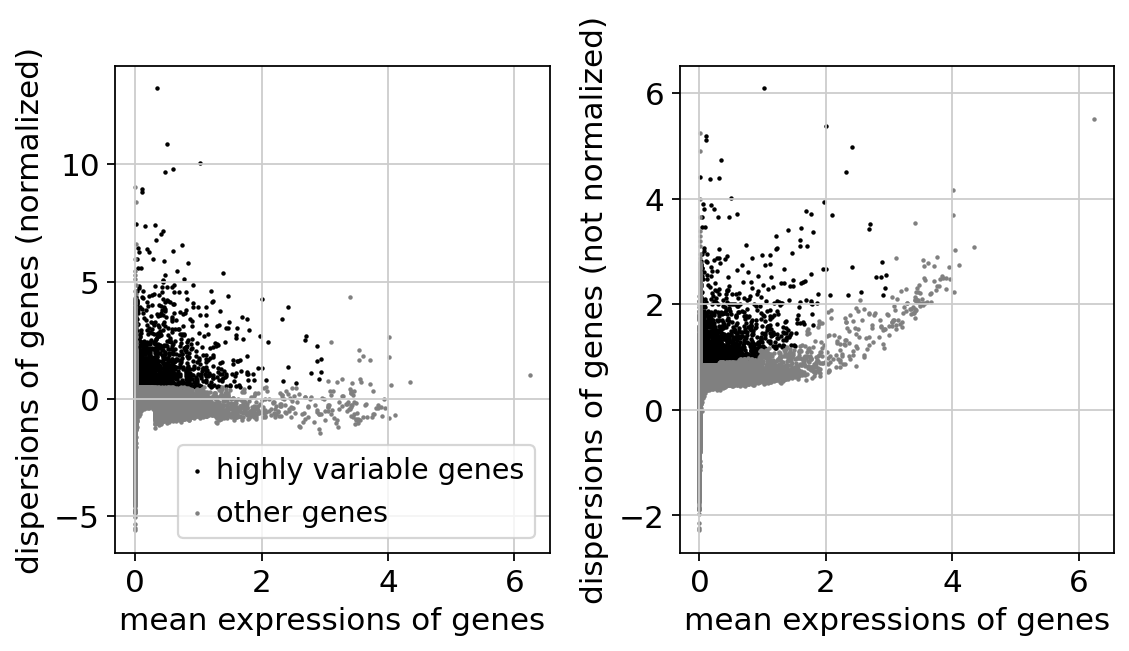

In [0]:
sc.pl.highly_variable_genes(adata)

In [0]:
adata.raw = adata

In [0]:
adata = adata[:, adata.var.highly_variable]

In [0]:
adata

View of AnnData object with n_obs × n_vars = 60832 × 2954
    obs: 'donor_label', 'batch', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p'

In [0]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:03:19)


In [0]:
sc.pp.scale(adata, max_value=10)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:21)


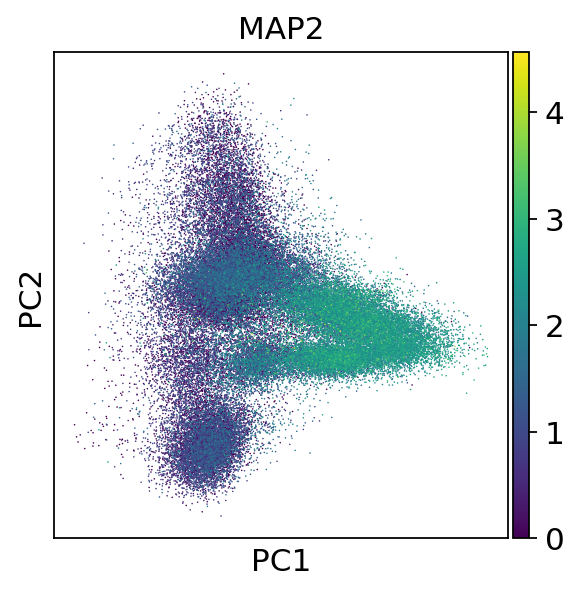

In [0]:
#use pca check the batch effect
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='MAP2')

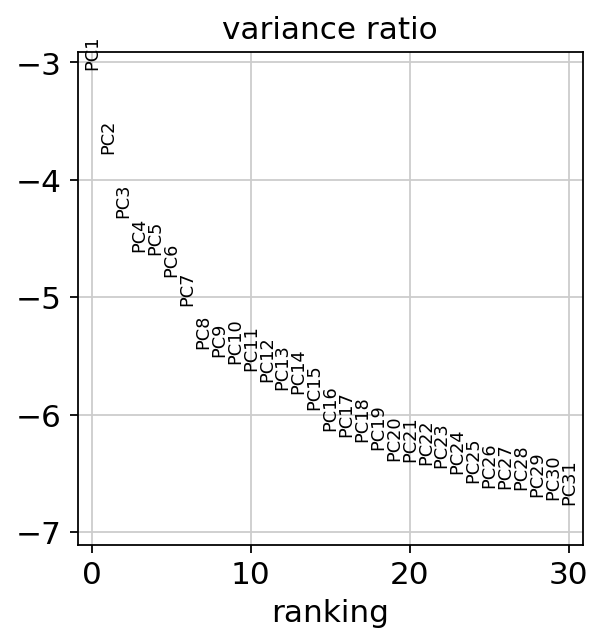

In [0]:
sc.pl.pca_variance_ratio(adata, log=True)

In [0]:
adata.write_h5ad("florian_concat_pca.h5ad")

## Check the clustering of the concatenated data

In [0]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:34)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:27)


In [0]:
sc.tl.leiden(adata)
sc.tl.leiden(adata, resolution=0.6, key_added="leiden_0.6")
sc.tl.leiden(adata, resolution=0.4, key_added="leiden_0.4")
sc.tl.leiden(adata, resolution=0.2, key_added="leiden_0.2")
sc.tl.leiden(adata, resolution=0.1, key_added="leiden_0.1")


running Leiden clustering
    finished: found 32 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:53)
running Leiden clustering
    finished: found 23 clusters and added
    'leiden_0.6', the cluster labels (adata.obs, categorical) (0:00:42)
running Leiden clustering
    finished: found 20 clusters and added
    'leiden_0.4', the cluster labels (adata.obs, categorical) (0:00:45)
running Leiden clustering
    finished: found 12 clusters and added
    'leiden_0.2', the cluster labels (adata.obs, categorical) (0:00:39)
running Leiden clustering
    finished: found 10 clusters and added
    'leiden_0.1', the cluster labels (adata.obs, categorical) (0:00:38)


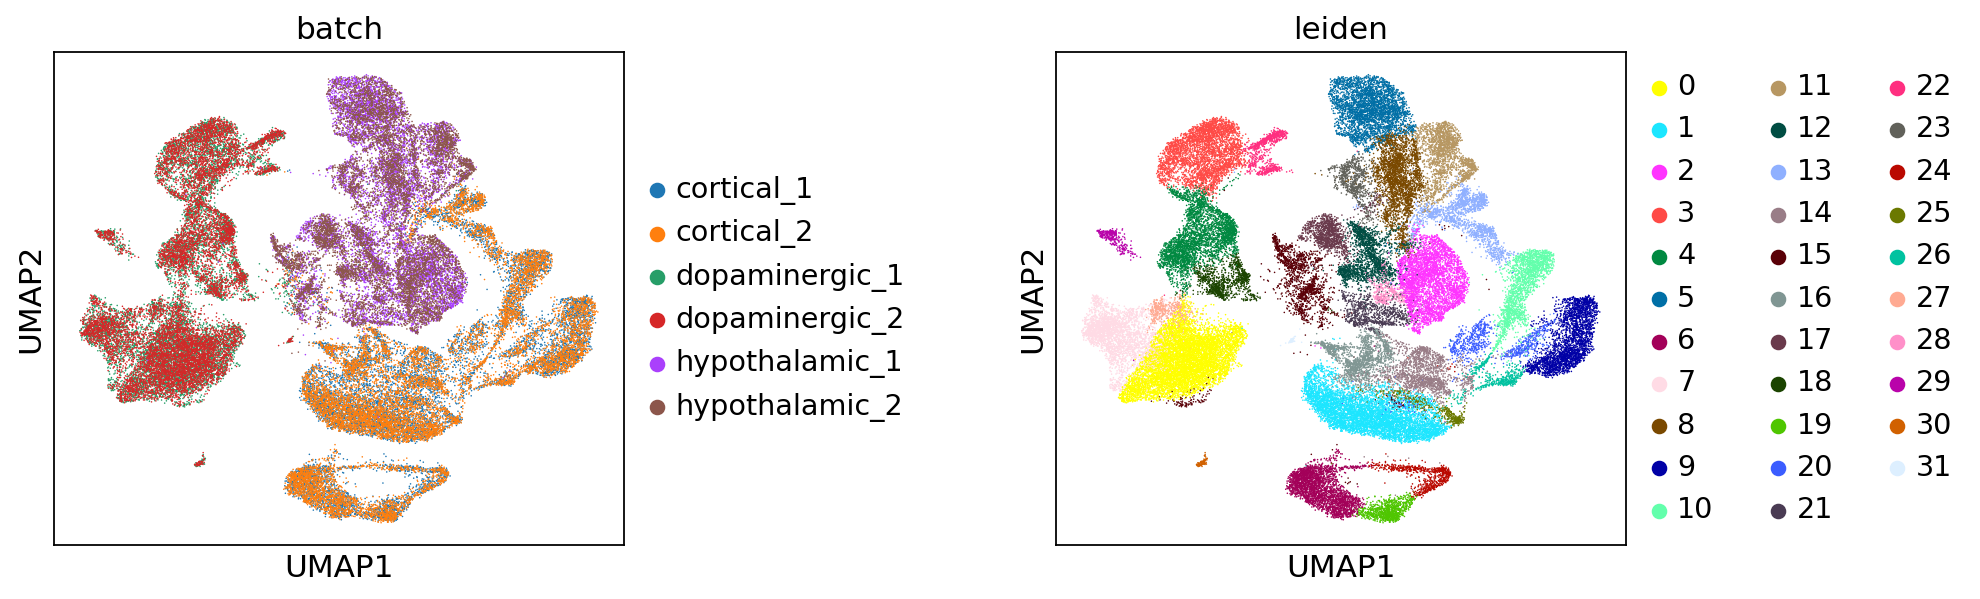

In [0]:
#palette=sc.pl.palettes.vega_20_scanpy, 
sc.pl.umap(adata, color=['batch', 'leiden'], wspace=0.6)

In [0]:
batch_name = adata.obs.batch.value_counts().index.to_list()
batch_name =['cortical_1','cortical_2','dopaminergic_1','dopaminergic_2','hypothalamic_1','hypothalamic_2'
 'dopaminergic_2',
 'cortical_1',
 'dopaminergic_1',
 'hypothalamic_2',
 'hypothalamic_1']

['cortical_2',
 'dopaminergic_2',
 'cortical_1',
 'dopaminergic_1',
 'hypothalamic_2',
 'hypothalamic_1']

Trying to set attribute `.uns` of view, copying.


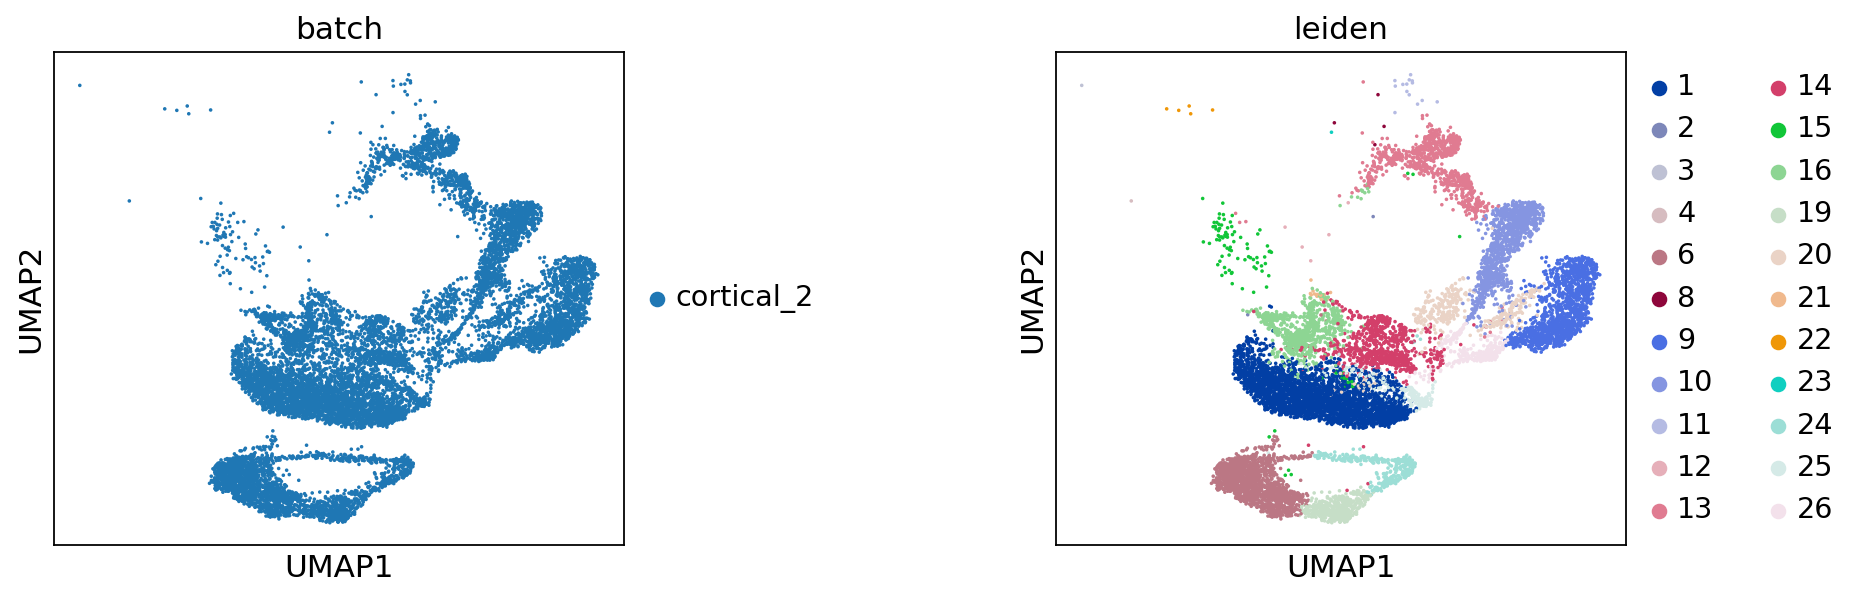

Trying to set attribute `.uns` of view, copying.


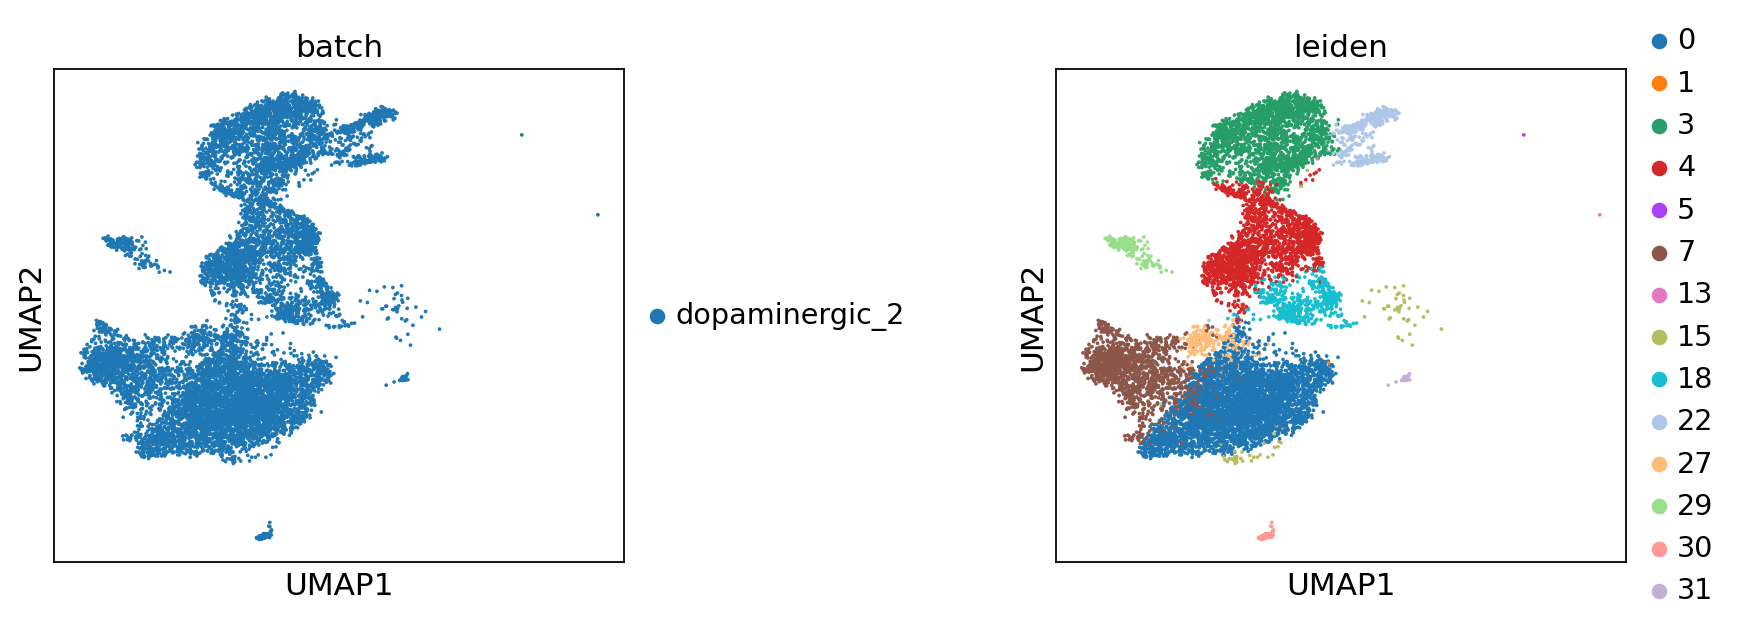

Trying to set attribute `.uns` of view, copying.


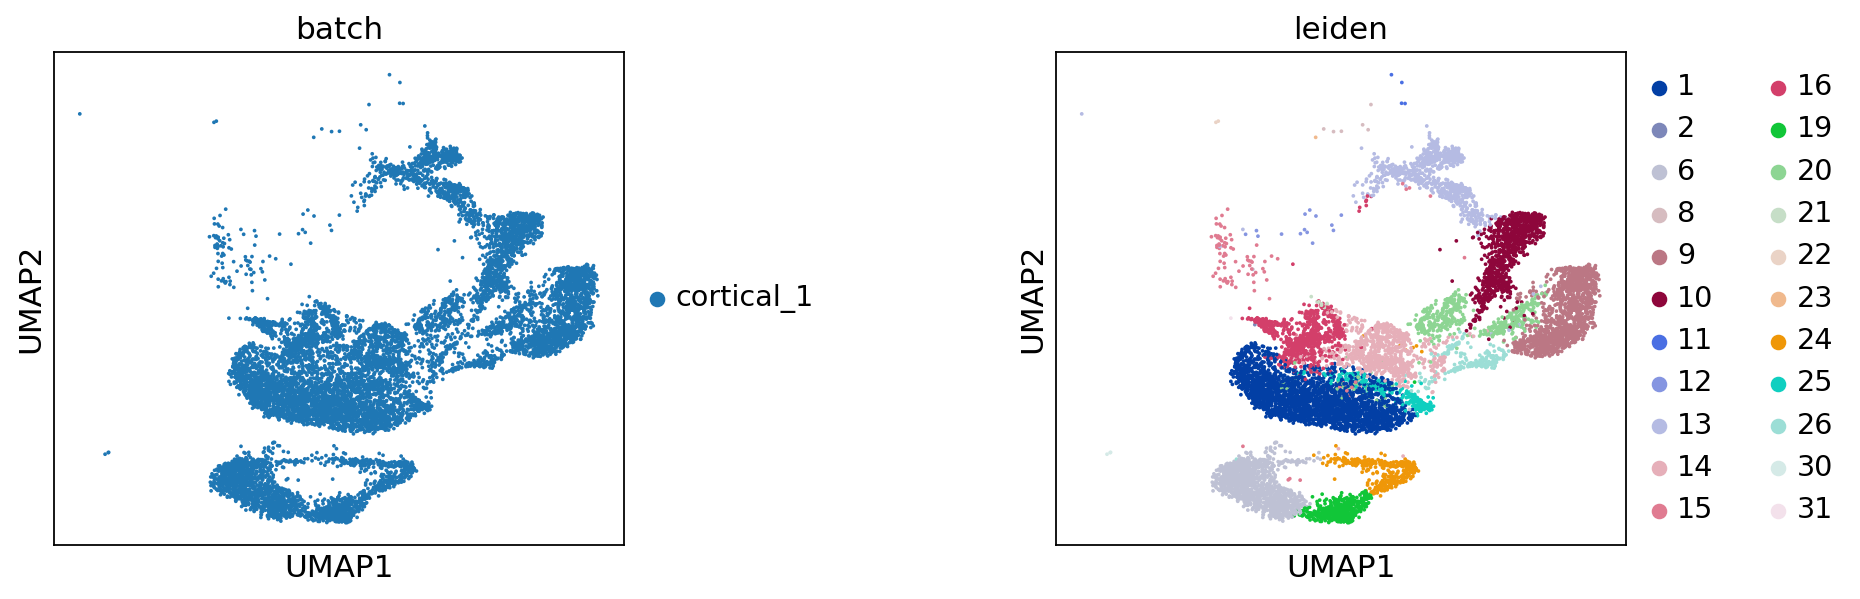

Trying to set attribute `.uns` of view, copying.


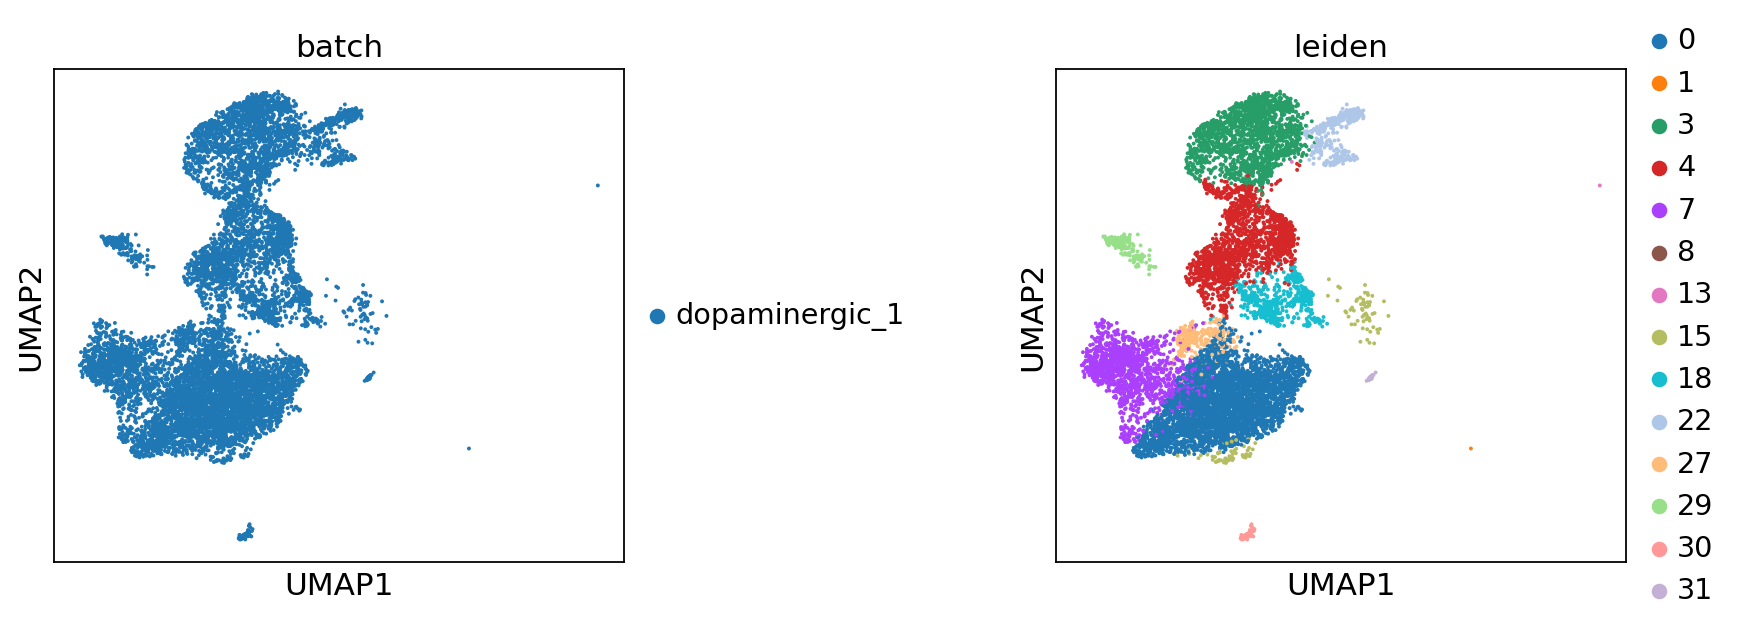

Trying to set attribute `.uns` of view, copying.


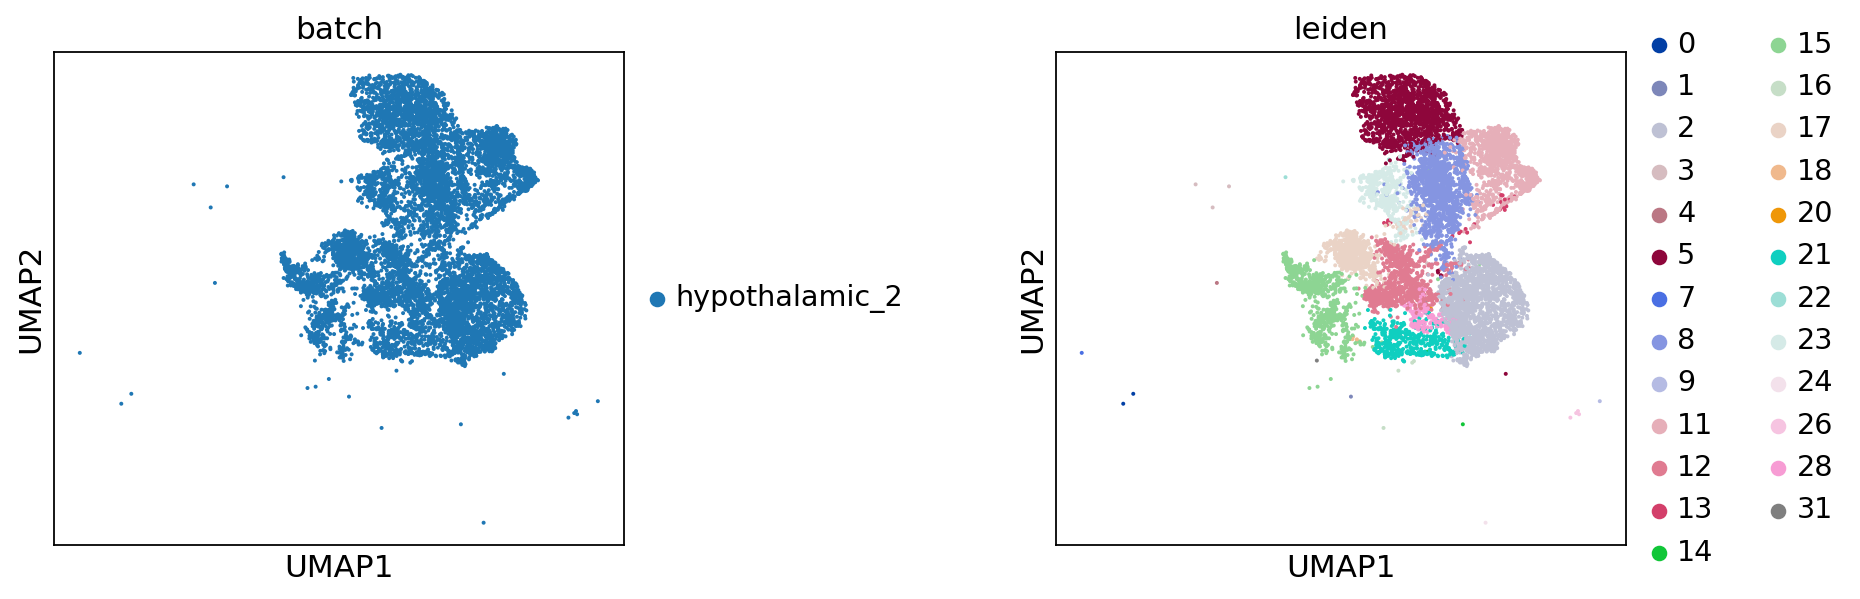

Trying to set attribute `.uns` of view, copying.


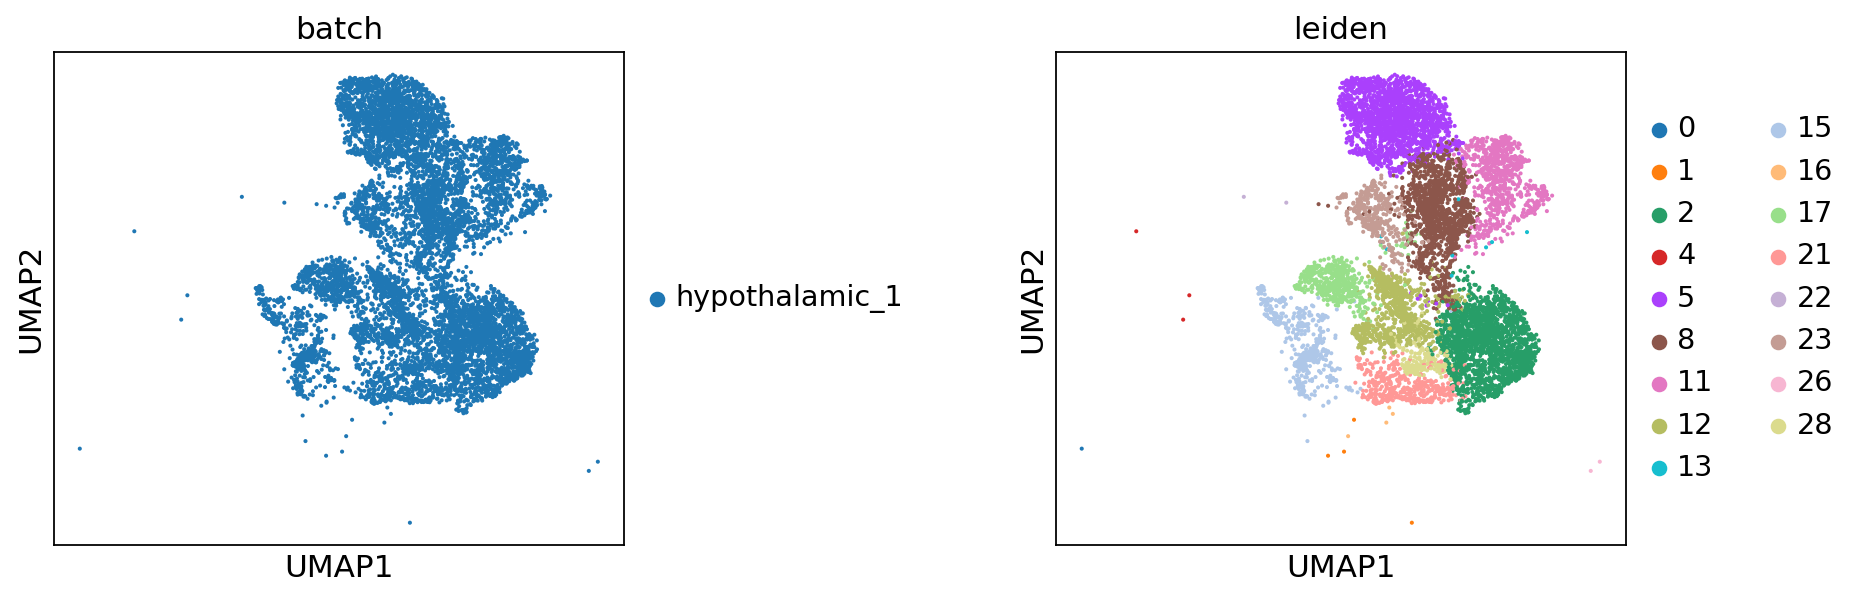

In [0]:

for batch in batch_name:
  sc.pl.umap(adata[adata.obs["batch"]==batch,:],color=['batch', 'leiden'], wspace=0.6, title=batch )

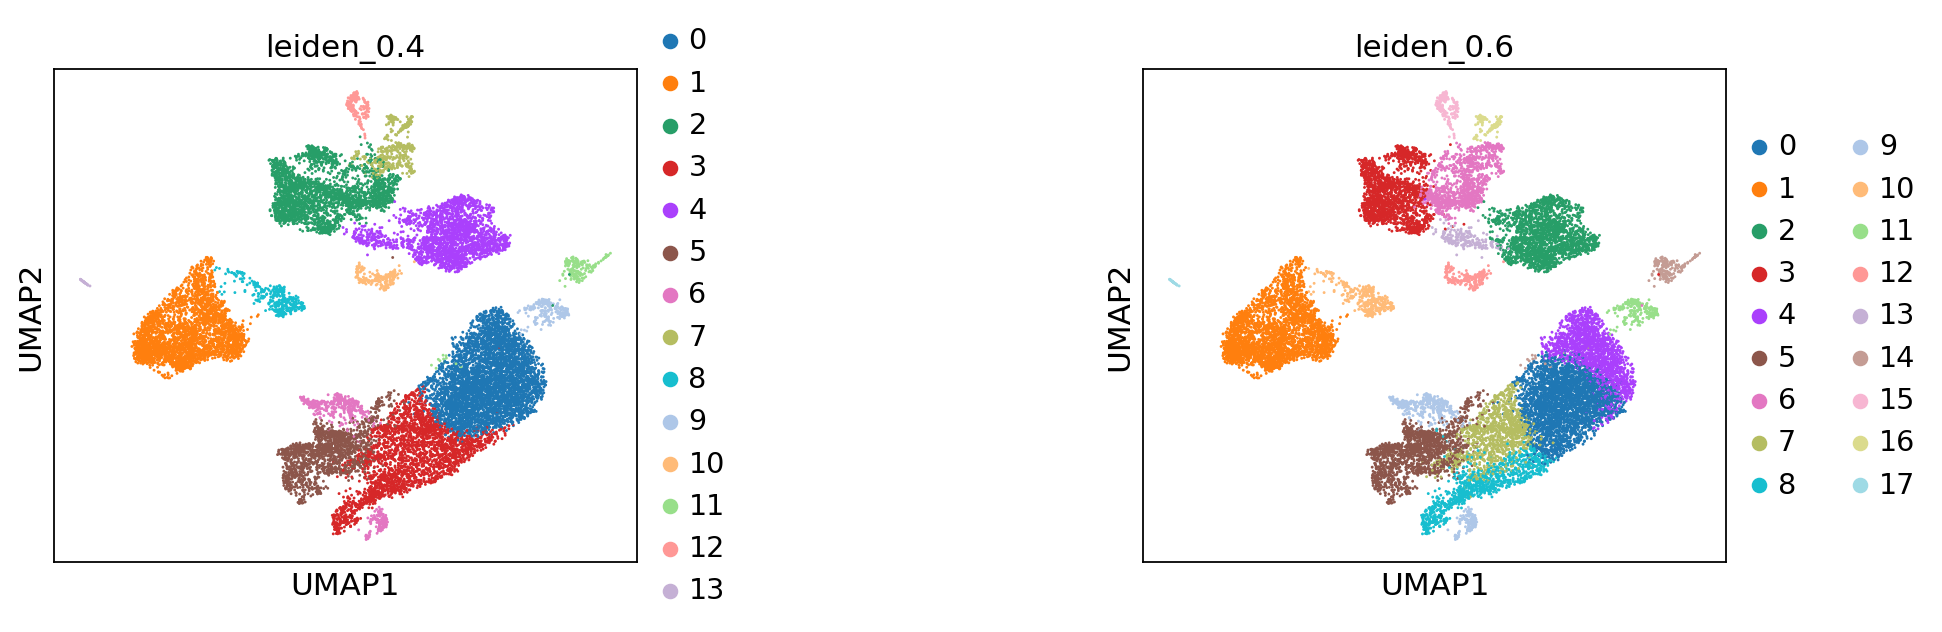

In [0]:
sc.pl.umap(adata, color=['leiden_0.4', 'leiden_0.6'], wspace=0.7)

In [0]:
sc.settings.set_figure_params(dpi=80,figsize=(4, 4))

Trying to set attribute `.uns` of view, copying.


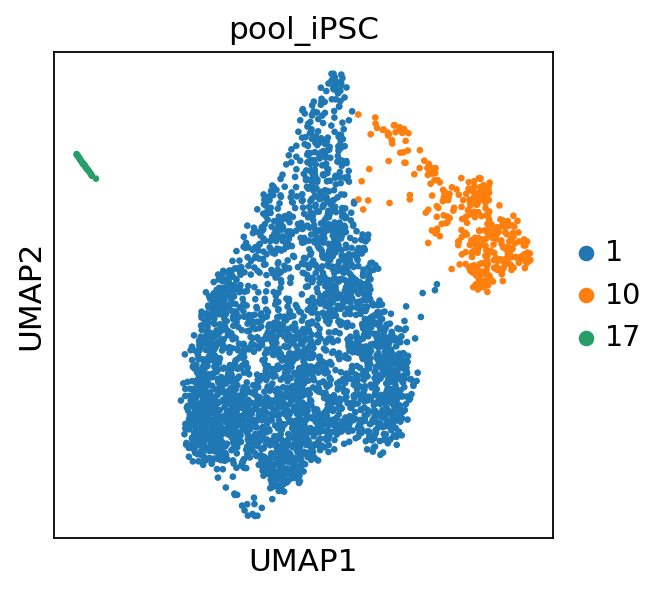

Trying to set attribute `.uns` of view, copying.


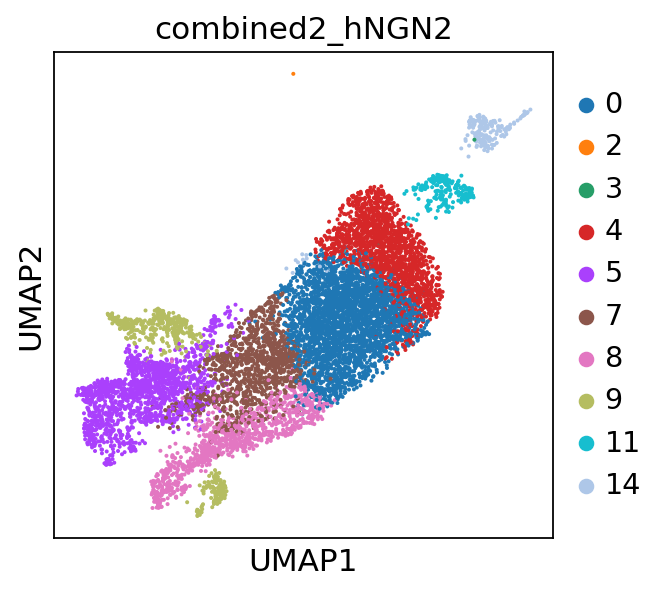

Trying to set attribute `.uns` of view, copying.


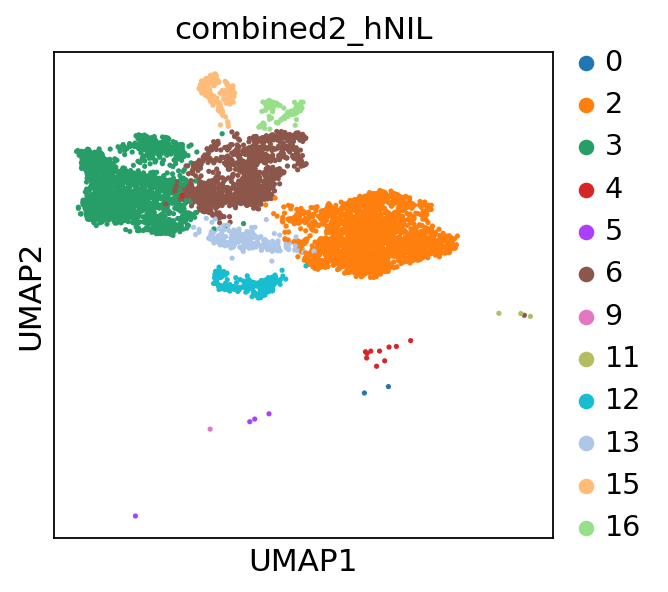

In [0]:
sc.pl.umap(adata[adata.obs.batch=="pool_iPSC"], color=['leiden_0.6'], title="pool_iPSC")
sc.pl.umap(adata[adata.obs.batch=="combined2_hNGN2"], color=['leiden_0.6'], title="combined2_hNGN2")
sc.pl.umap(adata[adata.obs.batch=="combined2_hNIL"], color=['leiden_0.6'], title="combined2_hNIL")

First inspection of the marker gene plots shows that cluster 11 is indeed characterized by high expression of mitochondrial genes. Together with the low counts this suggests a 'stressed' phenotype.

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:32)


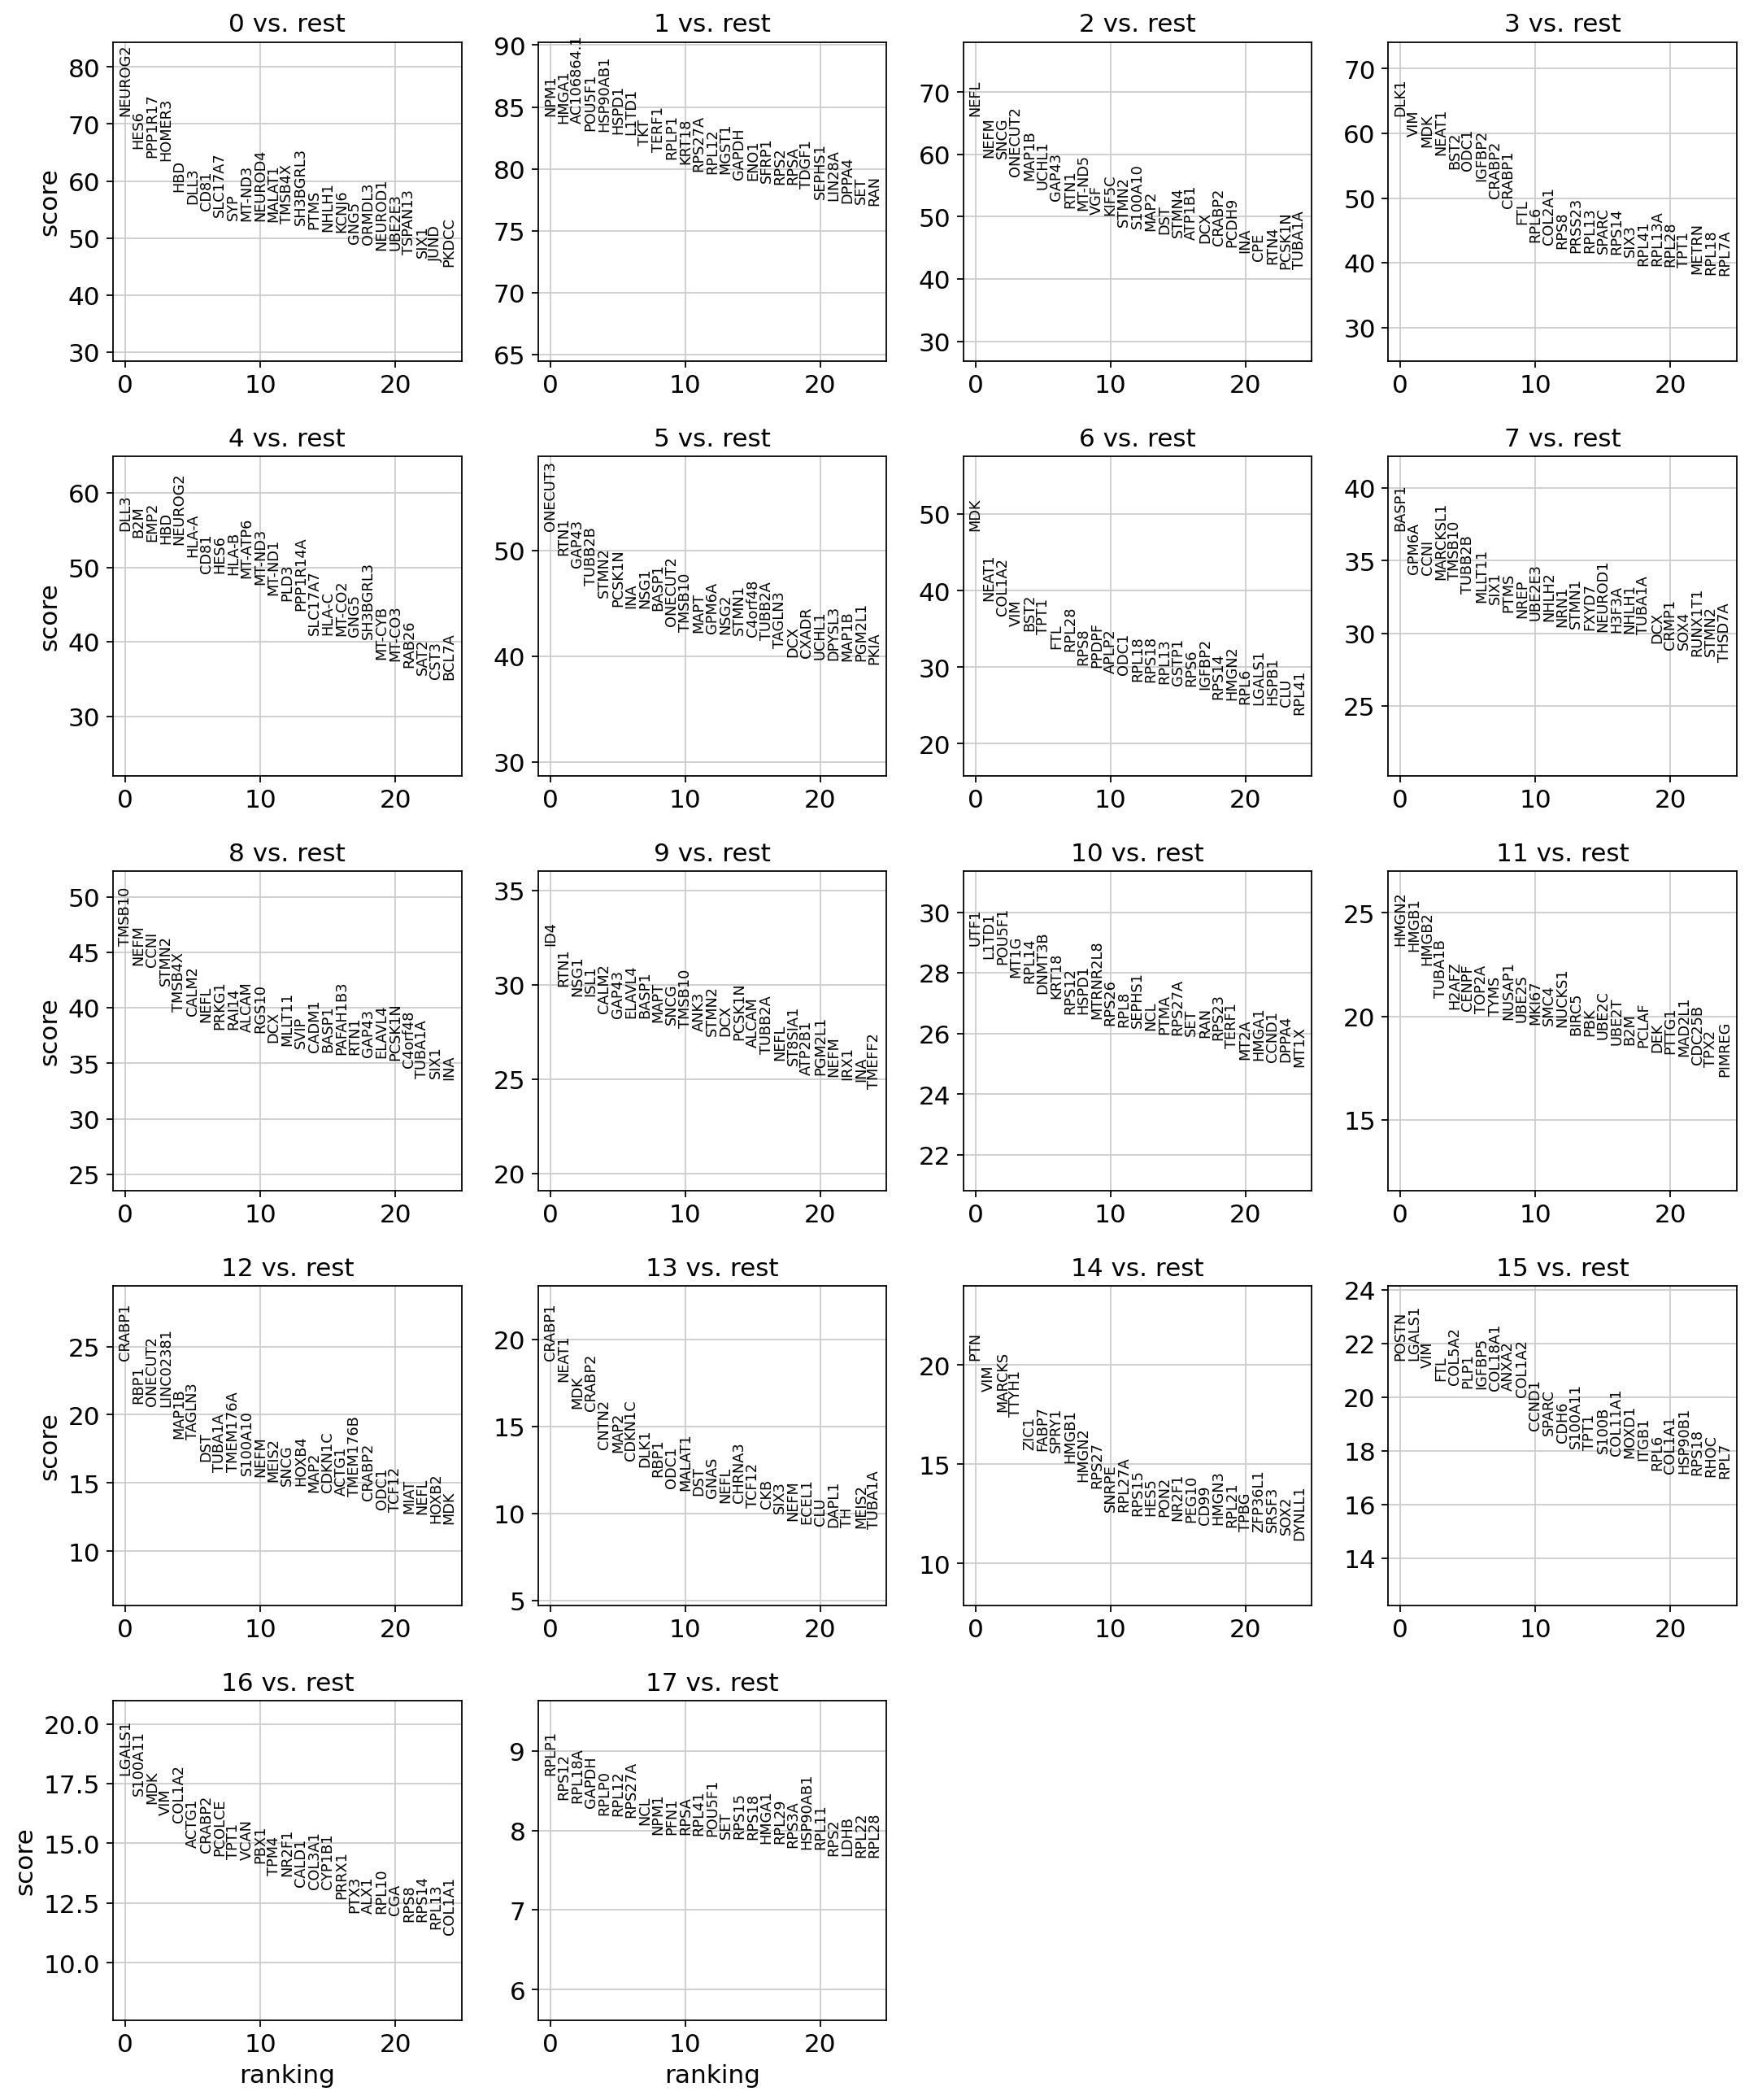

In [0]:
sc.tl.rank_genes_groups(adata, 'leiden_0.6', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [0]:
adata.write("concat3_donor_leiden_24May2020.h5ad")

In [0]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)

0           1        2       3  ...      14       15       16      17
0  NEUROG2        NPM1     NEFL    DLK1  ...     PTN    POSTN   LGALS1   RPLP1
1     HES6       HMGA1     NEFM     VIM  ...     VIM   LGALS1  S100A11   RPS12
2  PPP1R17  AC106864.1     SNCG     MDK  ...  MARCKS      VIM      MDK  RPL18A
3   HOMER3      POU5F1  ONECUT2   NEAT1  ...   TTYH1      FTL      VIM   GAPDH
4      HBD    HSP90AB1    MAP1B    BST2  ...    ZIC1   COL5A2   COL1A2   RPLP0
5     DLL3       HSPD1    UCHL1    ODC1  ...   FABP7     PLP1    ACTG1   RPL12
6     CD81       L1TD1    GAP43  IGFBP2  ...   SPRY1   IGFBP5   CRABP2  RPS27A
7  SLC17A7         TKT     RTN1  CRABP2  ...   HMGB1  COL18A1   PCOLCE     NCL
8      SYP       TERF1   MT-ND5  CRABP1  ...   HMGN2    ANXA2     TPT1    NPM1
9   MT-ND3       RPLP1      VGF     FTL  ...   RPS27   COL1A2     VCAN    PFN1

[10 rows x 18 columns]

In [0]:
gene_list = pd.DataFrame(adata.uns['rank_genes_groups']['names']).iloc[0, :].values


In [0]:
gene_list = ['NEUROG2', 'NPM1', 'NEFL', 'DLK1', 'DLL3', 'ONECUT3', 'MDK',
       'BASP1', 'TMSB10', 'ID4', 'UTF1', 'HMGN2', 'CRABP1', 'CRABP1',
       'PTN', 'POSTN', 'LGALS1', 'RPLP1']

In [0]:
sc.settings.set_figure_params(dpi=80, figsize=(10, 4))
for gene in gene_list:
  print(gene)
  sc.pl.violin(adata, gene, groupby='leiden_0.6')

Output hidden; open in https://colab.research.google.com to view.

In [0]:
sc.settings.set_figure_params(dpi=80, figsize=(4, 4))
for gene in gene_list:
  print(gene)
  sc.pl.umap(adata, color=['leiden_0.6', gene], wspace=0.5)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
marker_df = pd.read_csv("integrated_data/PanglaoDB_markers_27_Mar_2020_delete1.csv")

In [0]:
# Description: Interneurons create neural circuits, enabling communication between sensory or motor neurons and the central nervous system.
# Description: Neurons of the Trigeminal ganglion (relaying sensation in the face and motor functions).
# Description: A neuroblast is a postmitotic cell that does not divide further and which will develop into a neuron after a migration phase. 
# Neuroblasts differentiate from neural stem cells and are committed to become neurons.

In [0]:
cell_types = ['Dopaminergic neurons', 'GABAergic neurons', 'Glutaminergic neurons', 'Glycinergic neurons', 'Immature neurons', 
'Interneurons', 'Motor neurons', 'Neural stem/precursor cells', 'Neurons', 'Noradrenergic neurons', 'Neuroblasts', 'Neuroendocrine cells', 
'Adrenergic neurons', 'Cholinergic neurons', 'Noradrenergic neurons', 'Purkinje neurons', 'Serotonergic neurons', 'Trigeminal neurons']

In [0]:
marker_dic = {}
for type in cell_types:
  marker_dic[type] = marker_df[marker_df["cell type"] == type]["official gene symbol"].to_list()

cell_annotation = sc.tl.marker_gene_overlap(adata, marker_dic, key='rank_genes_groups')

In [0]:
cell_annotation

0    1    2    3    4  ...   13   14   15   16   17
Dopaminergic neurons         1.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0  0.0  0.0
GABAergic neurons            0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0
Glutaminergic neurons        1.0  0.0  1.0  0.0  1.0  ...  1.0  0.0  0.0  1.0  0.0
Glycinergic neurons          0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
Immature neurons             2.0  0.0  2.0  1.0  1.0  ...  1.0  1.0  0.0  0.0  0.0
Interneurons                 5.0  1.0  4.0  0.0  2.0  ...  2.0  0.0  0.0  1.0  0.0
Motor neurons                0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
Neural stem/precursor cells  6.0  1.0  1.0  2.0  3.0  ...  1.0  6.0  1.0  0.0  0.0
Neurons                      7.0  0.0  9.0  0.0  3.0  ...  6.0  1.0  1.0  0.0  0.0
Noradrenergic neurons        0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  0.0  0.0
Neuroblasts                  3.0  0.0  6.0  0.0  2.0  ...  0.0  1.0  0.0  1.0  0.0
Neuroendocrine cells         0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
Adrenergic neurons           0.0  0.0  0.0  0.0  0.0  ...  2.0  0.0  0.0  0.0  0.0
Cholinergic neurons          0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
Purkinje neurons             1.0  0.0  0.0  0.0  0.0  ...  2.0  0.0  0.0  0.0  0.0
Serotonergic neurons         0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
Trigeminal neurons           0.0  0.0  2.0  0.0  0.0  ...  1.0  0.0  0.0  0.0  0.0

[17 rows x 18 columns]

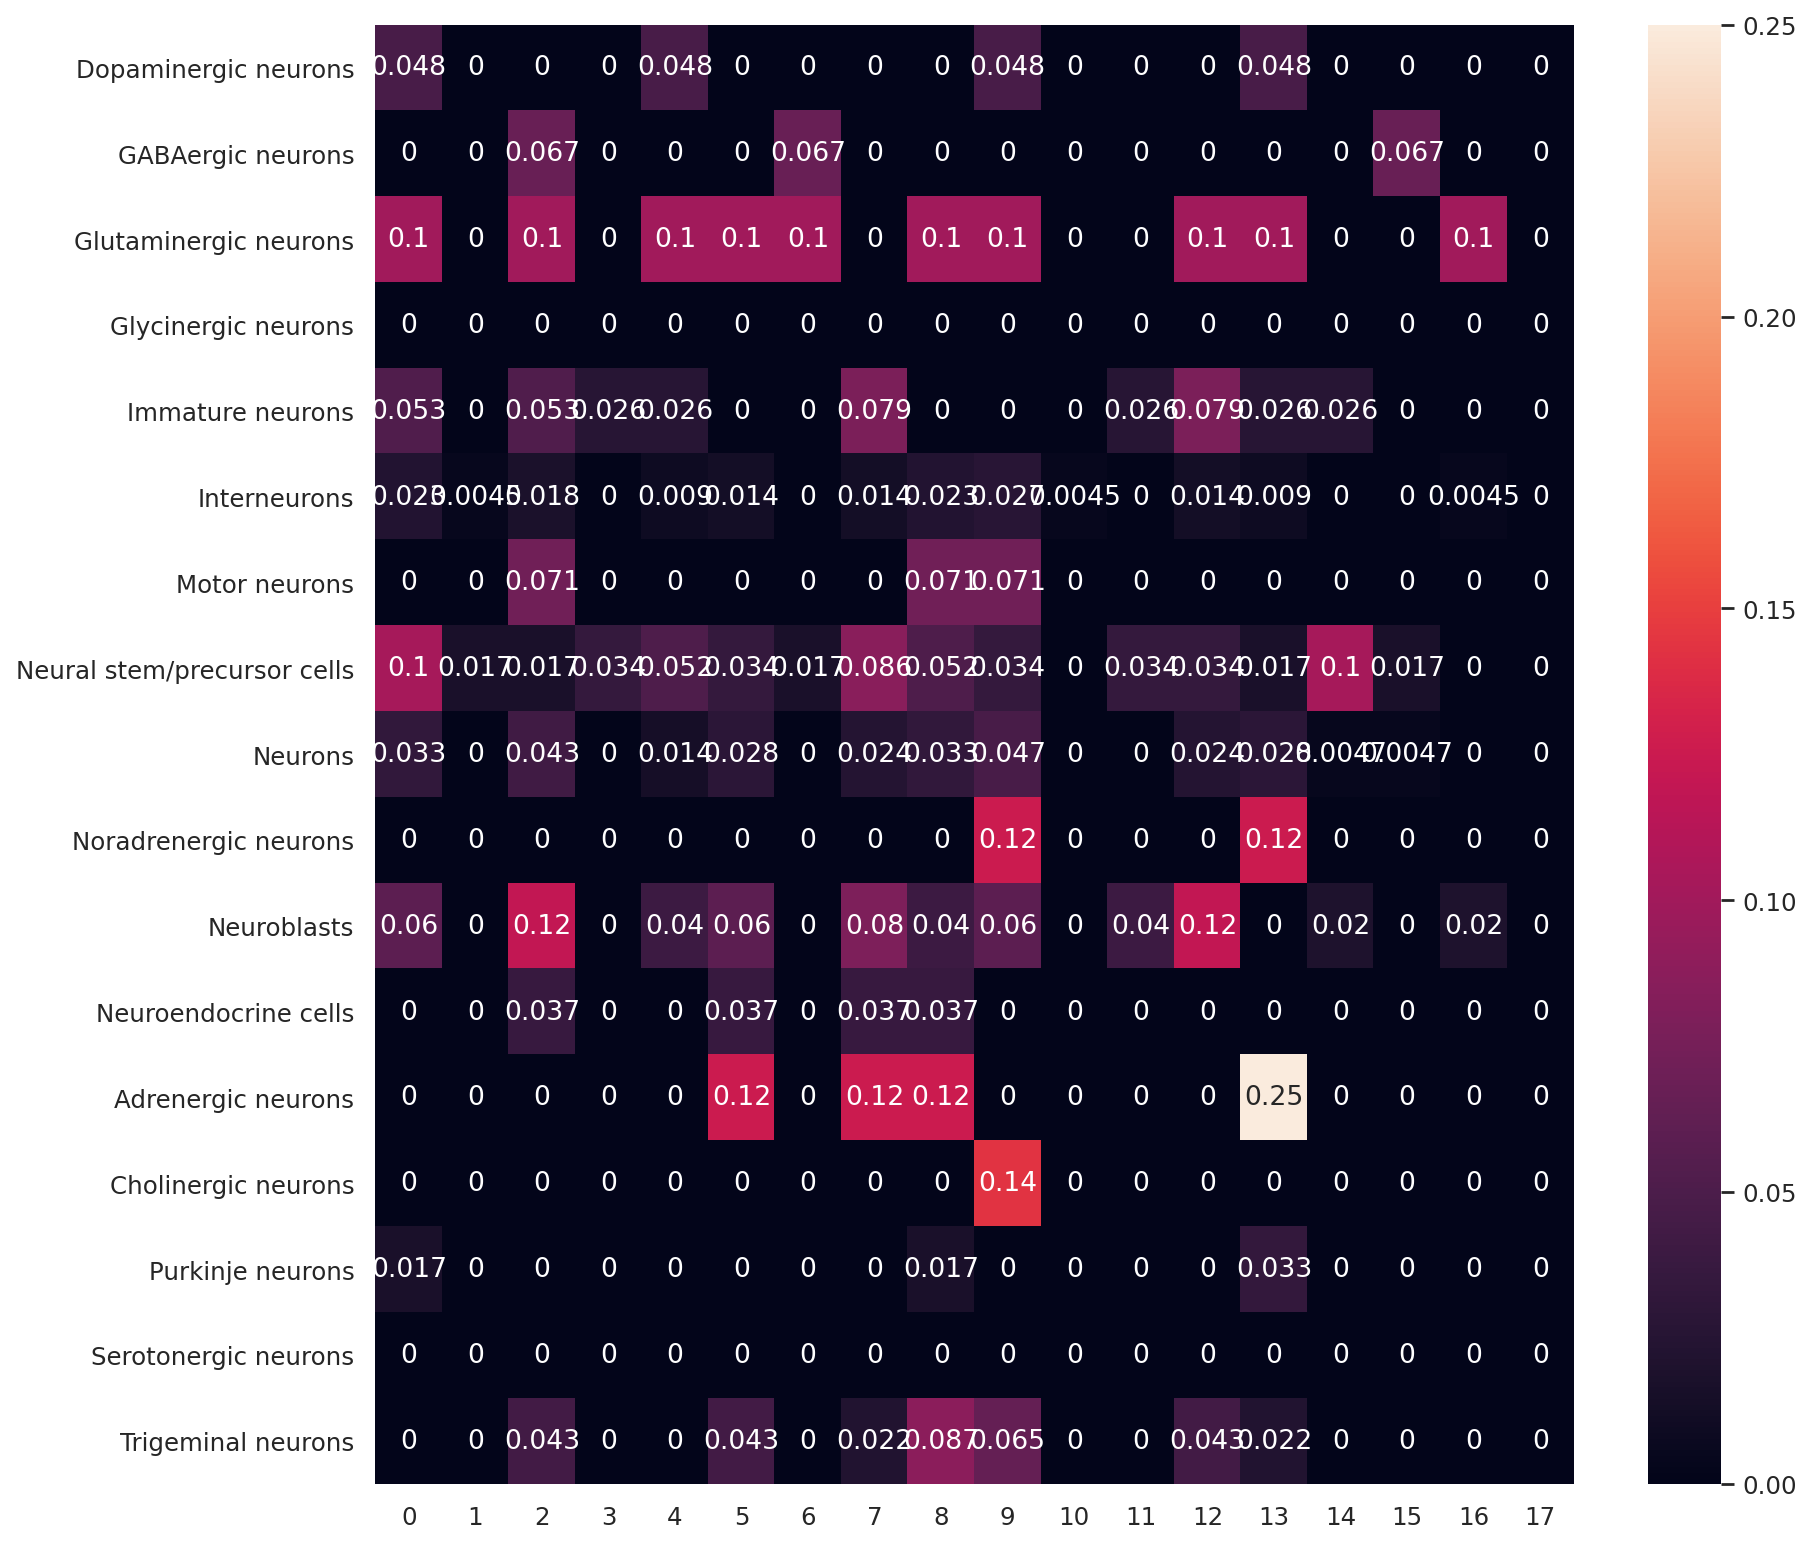

In [0]:

import seaborn as sb
cell_annotation_norm = sc.tl.marker_gene_overlap(adata, marker_dic, key='rank_genes_groups', normalize='reference')
sb.set(rc={'figure.figsize':(12, 12)})
# cbar=False, 
sb.heatmap(cell_annotation_norm, annot=True)

In [0]:
## ???refine known markers by only choose those only mainly expressed in less than 2 cell types
marker_dic2 = {}
for type in cell_types:
  marker_dic2[type] = marker_df[(marker_df["cell type"] == type) & (marker_df[""]) ]["official gene symbol"].to_list()

cell_annotation = sc.tl.marker_gene_overlap(adata, marker_dic2, key='rank_genes_groups')
cell_annotation

# Annotation

mixed, Glutaminergic neurons, Interneurons/precursor, Adrenergic neurons, mixed,

In [0]:
# reassing the cluster names
adata.rename_categories('leiden_0.4', ['TA', 'EP (early)', 'Stem', 'Goblet', 'EP (stress)', 'Enterocyte', 'Paneth', 'Enteroendocrine', 'Tuft'])

simply at the fraction of known marker genes that are found in the cluster marker gene sets from the rank_genes_groups() function.

In [0]:
#not execulte yet
out_dir = 'integrated_data/iPSC_combined2_hNGN2_NIL_13May2020.h5d'
adata.write(out_dir)